**Prediction using Supervised ML**

Aurthor: Muhammad Faizan Ahmed

---
Tasks:

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Step 1 - Reading the data from source**

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Step 2 - Input data Visualization**

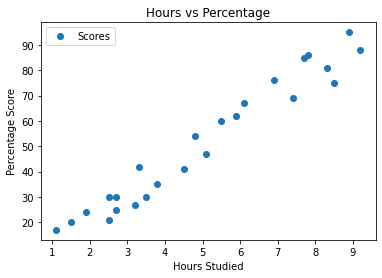

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


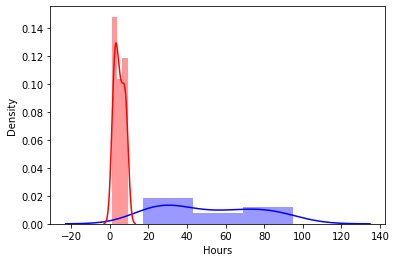

In [7]:
sb.distplot(df['Scores'], color="blue");
sb.distplot(df['Hours'],color="red");

**Step 3 - Data Preprocessing**

In [8]:
#Splitting the dataset into independent and dependent variaable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

**Step 4 - Model Training**

In [9]:
#Splitting the dataset into train and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
##algo=LinearRegression()
##algo.fit(X_train,y_train)
##LinearRegression()
y_pred=regressor.predict(X_test)

**Step 5 - Plotting the Line of regression**

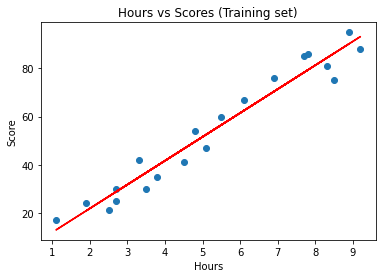

In [10]:
#Visualising the training set result
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

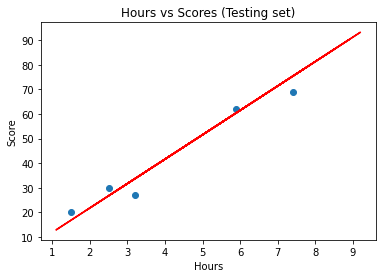

In [11]:
#Visualising the test set result
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Hours vs Scores (Testing set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

**Step 6 - Comparing Actual result to the Predicted Model result**

In [12]:
y_pred=regressor.predict(X_test)
pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred})

,Actual_Value,Predicted_Value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [13]:
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


**Step 7 - Prediction at Hour= 9.5hr/Day**

In [14]:
h=9.25
a=regressor.predict([[h]])
print('If student studies for {} hours per day he/she is likely to score {}%'.format(h,*a))

If student studies for 9.25 hours per day he/she is likely to score 93.69173248737539%


**Step 8 - Evaluating the model**

In [15]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354
